In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle as pickle
import os

In [3]:
data=pd.read_excel(r"C:\Users\Asus\OneDrive\Desktop\burnout excel for project.xlsx")

In [4]:
data.shape

(22750, 9)

In [5]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [6]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [7]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [8]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [9]:
data.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [11]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [12]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [13]:
data.isna().sum().values.sum()

4622

In [14]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Name: Burn Rate, dtype: float64

C:\Users\Asus\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


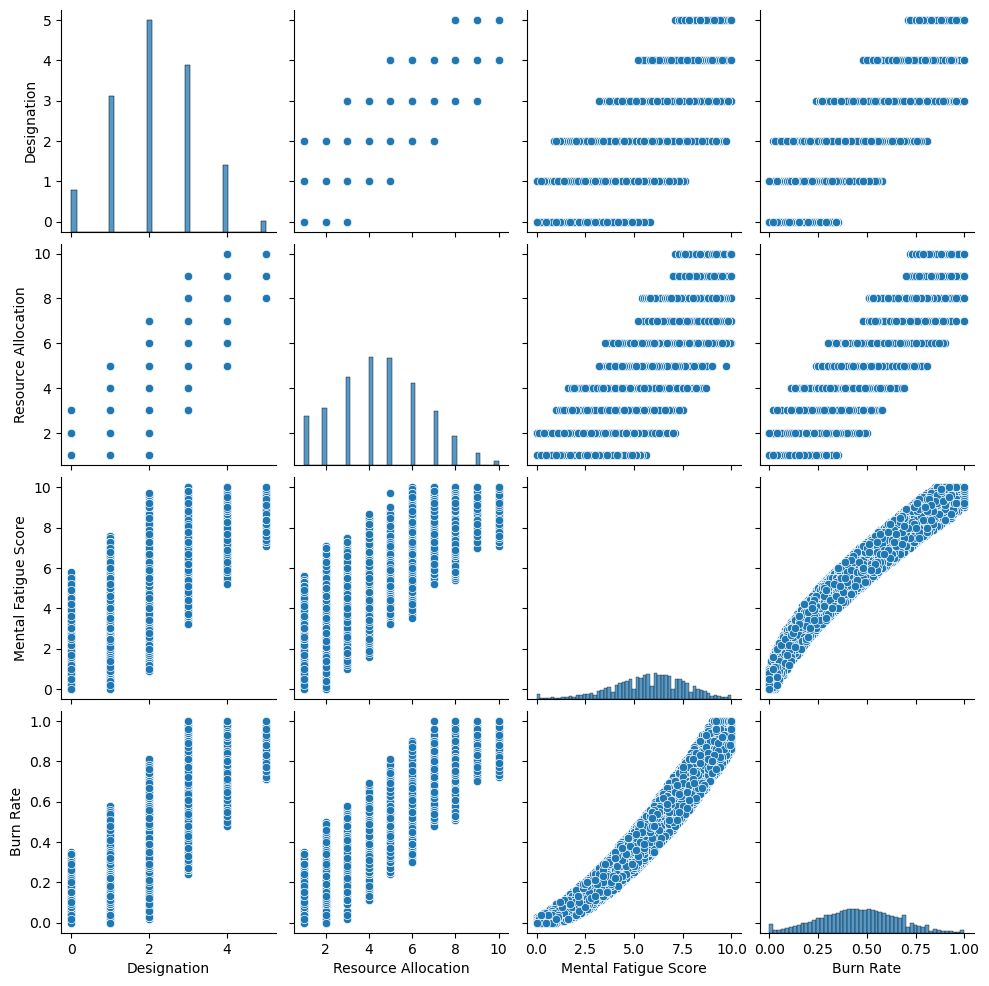

In [15]:
sns.pairplot(data)
plt.show()

In [16]:
data=data.dropna()

In [17]:
data.shape

(18590, 9)

In [18]:
data.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                      int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [19]:
data=data.drop('Employee ID',axis=1)

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

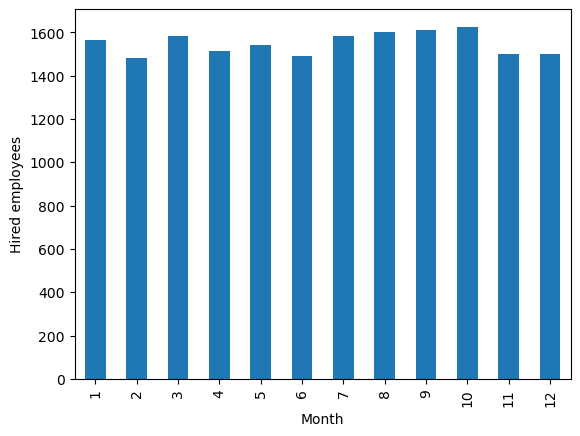

In [20]:
print(f"Min date {data['Date of Joining'].min()}")

print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month ["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")  
data_month ["Date of Joining"].groupby(data_month[ 'Date of Joining'].dt.month).count().plot(kind="bar", xlabel="Month",ylabel="Hired employees")

In [21]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

0        273
1        334
3        307
4        205
5        330
        ... 
22743    349
22744    147
22746     18
22748      9
22749      5
Name: Days, Length: 18590, dtype: int64

In [22]:
numeric_data = data.select_dtypes(include=['number']) 
correlation =numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [23]:
data.corr(numeric_only=True)['Burn Rate'][:]

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64

In [24]:
data=data.drop(['Date of Joining','Days'],axis=1)

In [25]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


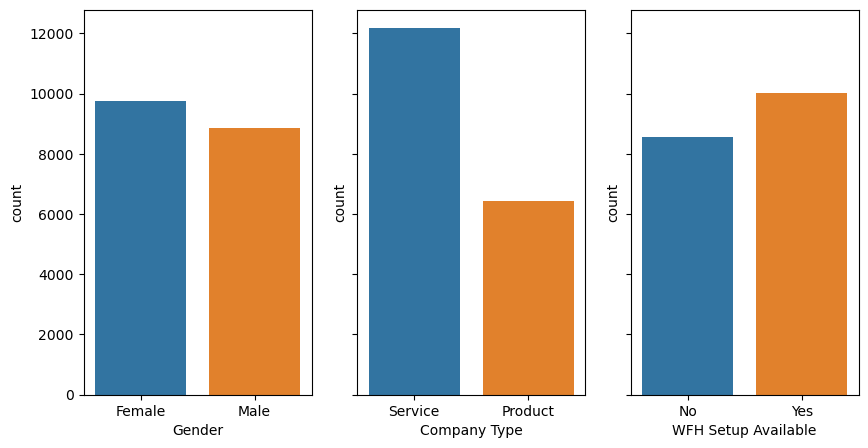

In [26]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10, 5)) 
for i, c in enumerate(cat_columns):
   sns.countplot(x=c, data=data, ax=ax[i])
plt.show()

In [27]:
data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available', 'Gender'], drop_first=True)

data.head()

encoded_columns = data.columns 

In [28]:
data.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True


In [29]:
#spliting the data
y=data['Burn Rate']
X=data.drop('Burn Rate',axis=1)

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
# Scale X
scaler =StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test =pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [31]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [32]:
y_train

8977     0.41
14115    0.34
8797     0.61
1173     0.35
1941     0.61
         ... 
13453    0.78
21179    0.30
6327     0.42
14933    0.54
288      0.57
Name: Burn Rate, Length: 13013, dtype: float64

In [33]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [34]:
print("Linear Regression Model Performance Metrics:\n")
y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse =mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae= mean_absolute_error(y_test, y_pred) 
print("Mean Absolute Error:", mae)

r2  =r2_score(y_test, y_pred) 
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031569779113610743
Root Mean Squared Error: 0.05618699058822313
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


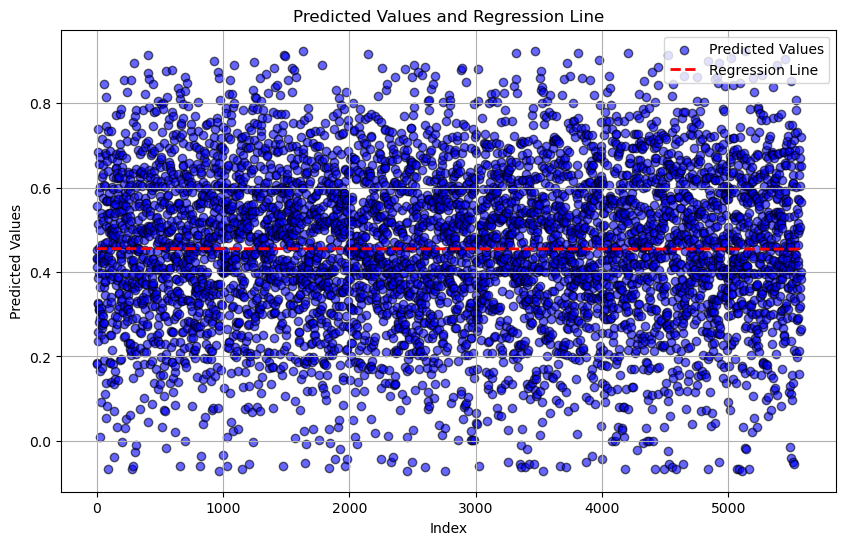

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

plt.figure(figsize=(10,6))
plt.scatter(range(len(y_pred)), y_pred, color='blue', edgecolor='k', alpha=0.6, label='Predicted Values')

# Compute the slope and intercept of the regression line
slope, intercept = np.polyfit(range(len(y_pred)), y_pred, 1)

# Create x values for the regression line
x = np.array([0, len(y_pred) - 1])
# Compute the corresponding y values for the regression line
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.xlabel('Index') 
plt.ylabel('Predicted Values')
plt.title('Predicted Values and Regression Line')

plt.grid(True)
plt.legend()
plt.show()
